In [1]:
%load_ext autoreload
%autoreload 2

# 1. Load Dataset

In [ ]:
from hcmus.core import appconfig
from hcmus.lbs import LabelStudioConnector
from hcmus.data import LbsDataset

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2025-04-12 16:26:29.728 | INFO     | hcmus.core.appconfig:<module>:7 - Load DotEnv: True


In [5]:
torch_device = "cpu"
lsb_connector = LabelStudioConnector(
    url=appconfig.LABEL_STUDIO_URL,
    api_key=appconfig.LABEL_STUDIO_API_KEY,
    project_id=appconfig.LABEL_STUDIO_PROJECT_MAPPING["validation"],
)
lsb_dataset = LbsDataset(lsb_connector, device=appconfig.TORCH_DEVICE, augmentation=False)

Loading tasks:   1%|          | 1/100 [00:01<02:32,  1.54s/it]
2025-04-12 16:26:46.324 | INFO     | hcmus.data._lbs_dataset:__init__:33 - Number of labels: 16
2025-04-12 16:26:46.325 | INFO     | hcmus.data._lbs_dataset:__init__:34 - Number of data points: 7


In [6]:
lsb_dataset._dataset[2]

{'image': '/Volumes/Cucumber/Projects/item-identification/local/temp/eed9b2d671a9fde4328c697b075abd77.jpg',
 'task': LabelStudioTask(id=2028, data={'image': '/data/upload/7/710b10f9-20250224_124505.jpg'}, meta={}, created_at=datetime.datetime(2025, 4, 12, 8, 7, 17, 195261, tzinfo=TzInfo(UTC)), updated_at=datetime.datetime(2025, 4, 12, 9, 20, 0, 3935, tzinfo=TzInfo(UTC)), is_labeled=True, overlap=1, inner_id=9, total_annotations=1, cancelled_annotations=0, total_predictions=0, comment_count=0, unresolved_comment_count=0, last_comment_updated_at=None, project=7, updated_by=1, file_upload=3439, comment_authors=[], annotations=[Annotation(id=1746, result=[AnnotationResult(original_width=1200, original_height=900, image_rotation=0, value=RectangleLabel(x=27.428057553956837, y=21.58273381294964, width=8.72302158273381, height=11.03117505995204, rotation=0, rectanglelabels=['8934563651138-mi-hao-hao,-vi-tom-chua-cayacecook,-coc-(67g)']), id='rFEbV7vmq1', from_name='label', to_name='image', ty

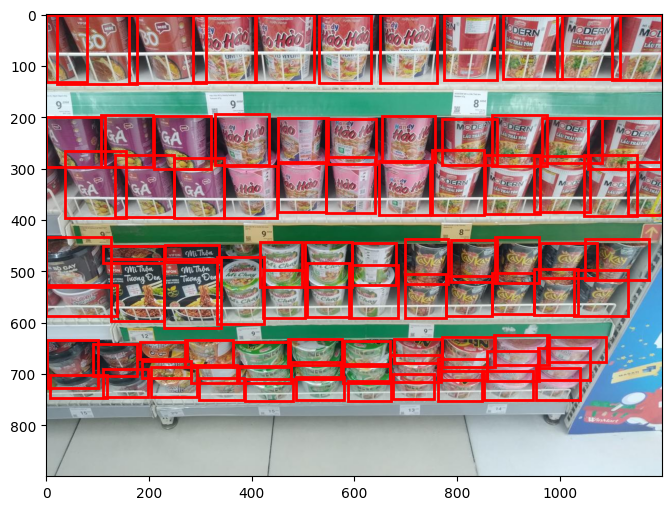

In [7]:
from hcmus.utils import viz_utils
tensor, target = lsb_dataset[2]
image = lsb_dataset.tensor_to_image(tensor)
viz_utils.draw_boxes(image, target["boxes"].cpu())

# 2. Finetune Model